In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

features = []

with open("UCI HAR Dataset/features.txt") as f:
    features =[line.split()[1] for line in f.readlines()]

print("Number of features: {}".format(len(features)))

Number of features: 561


In [3]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [4]:
X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
X_train.columns = features
X_train['subject'] = pd.read_csv('UCI HAR dataset/train/subject_train.txt', header=None, squeeze=True)


y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, names=['Activity'], squeeze=True)

y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

X_train['Activity'] = y_train
X_train['Activity Name'] = y_train_labels

In [5]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [6]:
print(X_train.shape, y_train.shape)

(7352, 564) (7352,)


In [7]:
X_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
X_test.columns = features
X_test['subject'] = pd.read_csv('UCI HAR dataset/test/subject_test.txt', header=None, squeeze=True)

y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, names=['Activity'], squeeze=True)

y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

X_test['Activity'] = y_test
X_test['Activity Name'] = y_test_labels

In [8]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity Name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


## Data Cleaning

In [9]:
print("Number of duplicates in train: {}".format(sum(X_train.duplicated())))
print("Number of duplicates in test: {}".format(sum(X_test.duplicated())))

Number of duplicates in train: 0
Number of duplicates in test: 0


In [10]:
print("Number of duplicates in train: {}".format((X_train.isnull().values.sum())))
print("Number of duplicates in test: {}".format((X_test.isnull().values.sum())))

Number of duplicates in train: 0
Number of duplicates in test: 0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

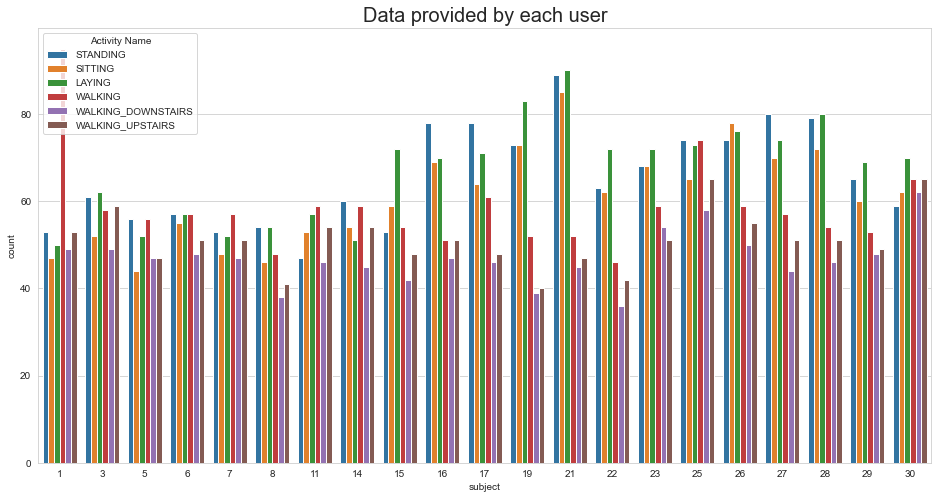

In [12]:
plt.figure(figsize=(16, 8))
plt.title("Data provided by each user", fontsize=20)
sns.countplot(x='subject', hue='Activity Name', data=X_train)
plt.show()

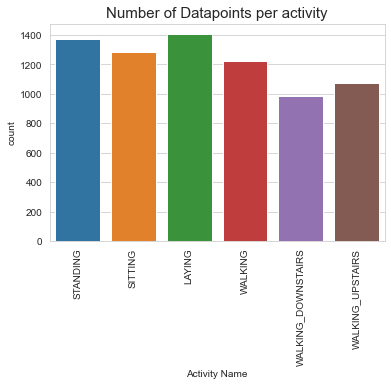

In [13]:
plt.title("Number of Datapoints per activity", fontsize=15)
sns.countplot(x = X_train['Activity Name'])
plt.xticks(rotation=90)
plt.show()

In [14]:
# Changing Feature Names

columns = X_train.columns

columns = columns.str.replace('[()]', '',regex=True)
columns = columns.str.replace('[-]', '',regex=True)
columns = columns.str.replace('[,]', '',regex=True)

X_train.columns = columns
X_test.columns = columns

X_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,Activity Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [15]:
X_train.to_csv("UCI HAR Dataset/csv_files/train.csv", index=False)
X_test.to_csv("UCI HAR Dataset/csv_files/test.csv", index=False)

### EDA

# Comparing Static and Dynamic features


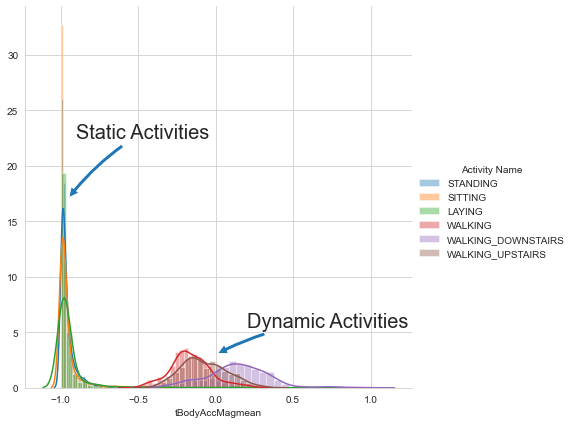

In [16]:

facetgrid = sns.FacetGrid(X_train, hue='Activity Name', height=6)
facetgrid.map(sns.distplot, "tBodyAccMagmean").add_legend()
plt.annotate("Static Activities", xy=(-0.956, 17), xytext=(-0.9, 23), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple", connectionstyle="arc3, rad=0.1"))
plt.annotate("Dynamic Activities", xy=(0, 3), xytext=(0.2, 6), size=20, va='center', ha='left', arrowprops=dict(arrowstyle="simple", connectionstyle="arc3, rad=0.1"))
plt.show()

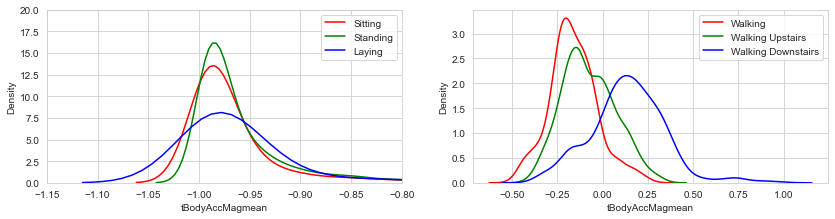

In [17]:
plt.figure(figsize=(14, 7))
plt.subplot(2,2,1)
sns.distplot(X_train[X_train['Activity']==4]['tBodyAccMagmean'], label='Sitting', color='r', hist=False)
sns.distplot(X_train[X_train['Activity']==5]['tBodyAccMagmean'], label='Standing', color='g', hist=False)
sns.distplot(X_train[X_train['Activity']==6]['tBodyAccMagmean'], label='Laying', color='b', hist=False)
plt.axis([-1.15, -0.8, 0, 20])
plt.legend(loc='upper right')

plt.subplot(2,2,2)
sns.distplot(X_train[X_train['Activity']==1]['tBodyAccMagmean'], label='Walking', color='r', hist=False)
sns.distplot(X_train[X_train['Activity']==2]['tBodyAccMagmean'], label='Walking Upstairs', color='g', hist=False)
sns.distplot(X_train[X_train['Activity']==3]['tBodyAccMagmean'], label='Walking Downstairs', color='b', hist=False)
# plt.axis([-1.15, -0.8, 0, 20])
plt.legend(loc='upper right')

plt.show()

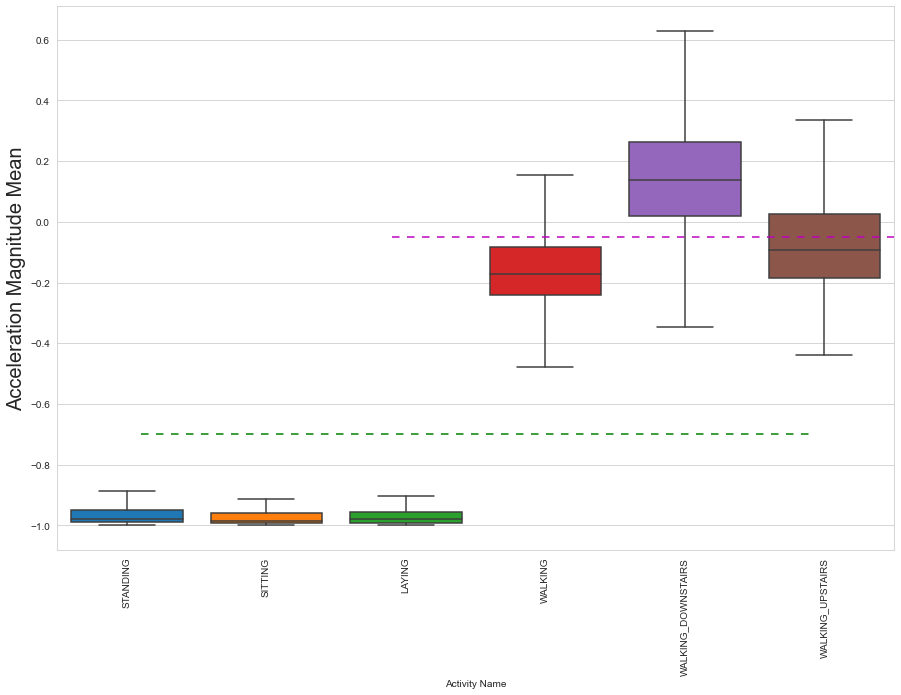

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Activity Name', y='tBodyAccMagmean', data=X_train, showfliers=False, saturation=1)
plt.ylabel("Acceleration Magnitude Mean", size=20)
plt.axhline(y = -0.7, xmin=0.1, xmax=0.9, dashes=(5,5), c='g')
plt.axhline(y = -0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

### Observation: 
- Static and Dynamic features are well seperated.

## Applying TSNE

In [19]:
from sklearn.manifold import TSNE

In [21]:
X_tsne = X_train.drop(['subject', 'Activity', 'Activity Name'], axis=1)
y_tsne = X_train['Activity Name']


In [38]:
X_reduced = TSNE(verbose=2, perplexity=5).fit_transform(X_tsne)


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 2.920s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.130s
[t-SNE] Iteration 50: error = 113.9842148, gradient norm = 0.0229118 (50 iterations in 2.598s)
[t-SNE] Iteration 100: error = 97.4739838, gradient norm = 0.0159629 (50 iterations in 1.486s)
[t-SNE] Iteration 150: error = 93.1144638, gradient norm = 

In [39]:
X_reduced.shape

(7352, 2)

In [40]:
df_reduced = pd.DataFrame({'x': X_reduced[:, 0], 'y':X_reduced[:, 1], 'label': y_tsne})

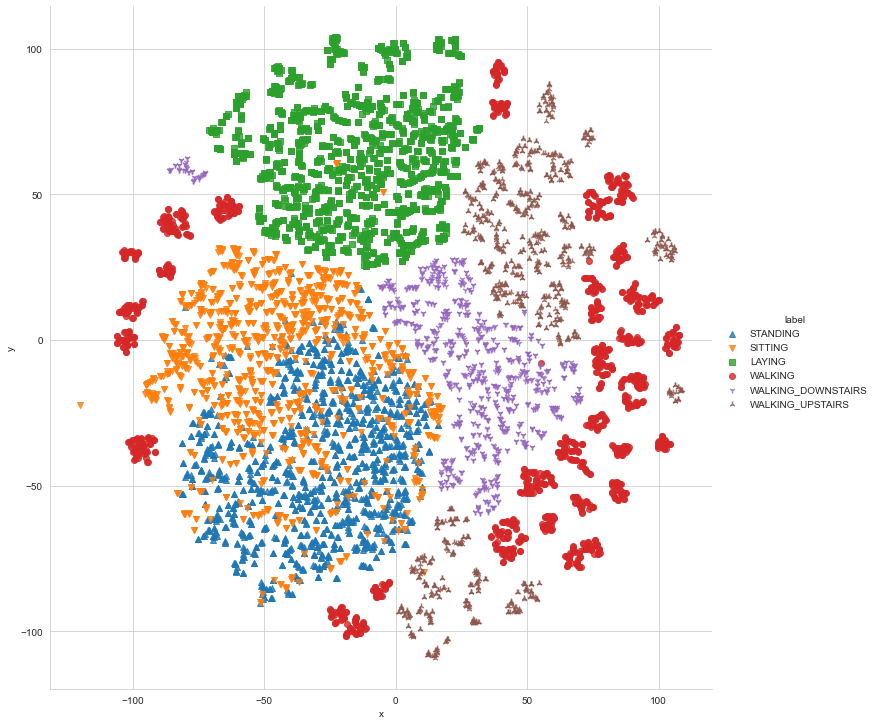

In [41]:
sns.lmplot(data=df_reduced, x='x', y='y', hue='label', size=10, fit_reg=False, markers=['^', 'v', 's', 'o', '1', '2'])

### Observation:
- Most of the activities are well seperated, and can be seperated with linear classifiers.
- If we look at the above plot closely, we'll see that only sitting and standing are not well seperated, so we can expect our model to perform relatively less with these activites as targets.